In [1]:
using Revise
using NonEqDigits

Precompiling packages...
   5865.7 ms  ✓ NonEqDigits
  1 dependency successfully precompiled in 8 seconds. 351 already precompiled.


In [384]:
using GLMakie
using CairoMakie
using JLD2
using GraphvizDotLang: attr
using GraphvizDotLang

# V1

In [4]:
using Graphs.Experimental

In [31]:
L = 6
rs = ca_ucodes_f1()
# rs = 0:255
mas = MolAut.(L, rs;
    # reduced=true
    reduced=false
);

In [32]:
ma = rand(mas)
nothing

In [33]:
acs = attracting_components(ma.mg)

5-element Vector{Vector{Int64}}:
 [22]
 [12, 10, 26, 28]
 [43]
 [23, 19, 51, 55]
 [45, 37, 38, 46]

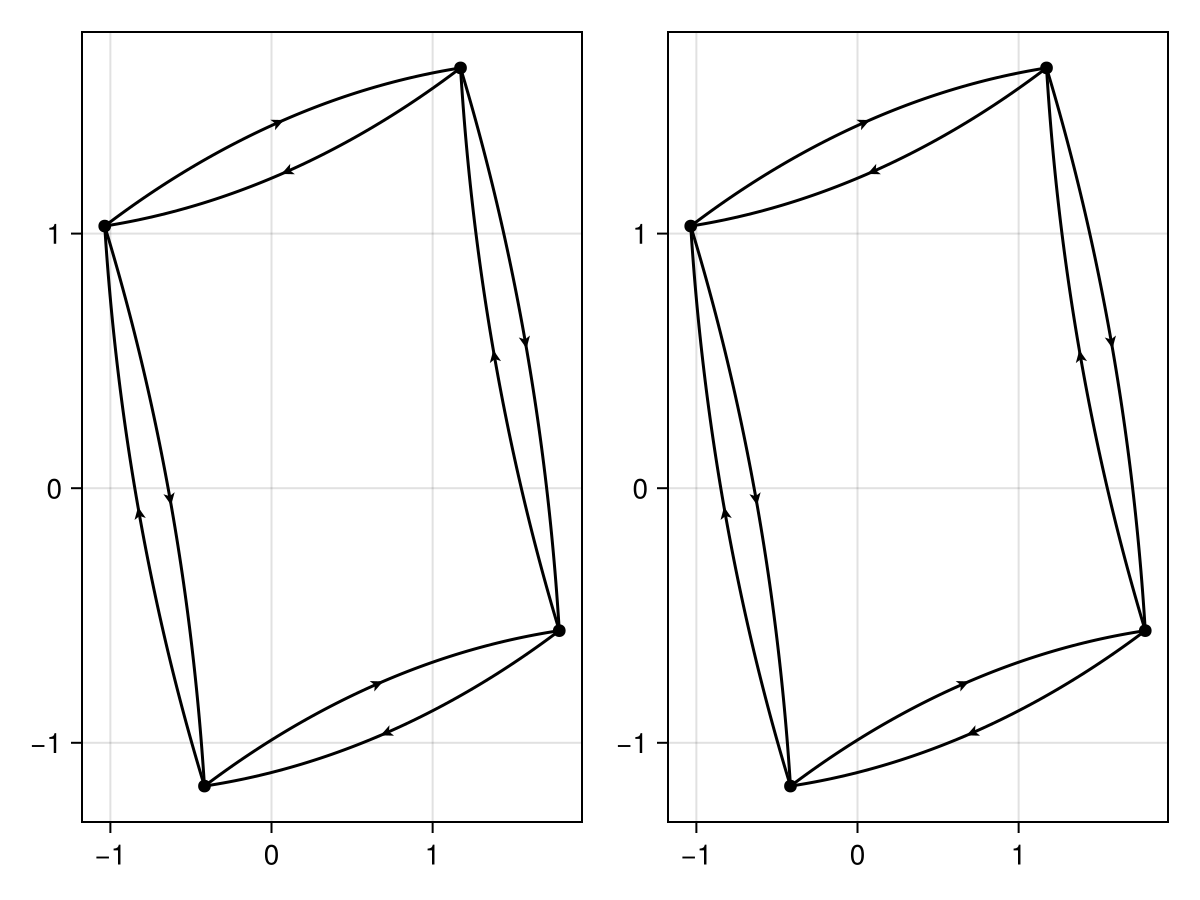

In [66]:
g1, xx1 = induced_subgraph(ma.mg, acs[2])
g2, xx2 = induced_subgraph(ma.mg, acs[2])
f = Figure()
ax1 = Axis(f[1,1])
ax2 = Axis(f[1,2])
graphplot!(ax1, g1)
graphplot!(ax2, g2)
f

In [91]:
xx = Graphs.Experimental.all_isomorph(SimpleGraph(g1), SimpleGraph(g2);
    vertex_relation=function (x,y)
        # @show x y
        true
    end
    # edge_relation=(x,y)->true
)
collect(xx)

8-element Vector{Vector{Tuple{Int64, Int64}}}:
 [(1, 1), (2, 2), (3, 3), (4, 4)]
 [(1, 1), (4, 2), (3, 3), (2, 4)]
 [(2, 1), (1, 2), (4, 3), (3, 4)]
 [(2, 1), (3, 2), (4, 3), (1, 4)]
 [(3, 1), (2, 2), (1, 3), (4, 4)]
 [(3, 1), (4, 2), (1, 3), (2, 4)]
 [(4, 1), (1, 2), (2, 3), (3, 4)]
 [(4, 1), (3, 2), (2, 3), (1, 4)]

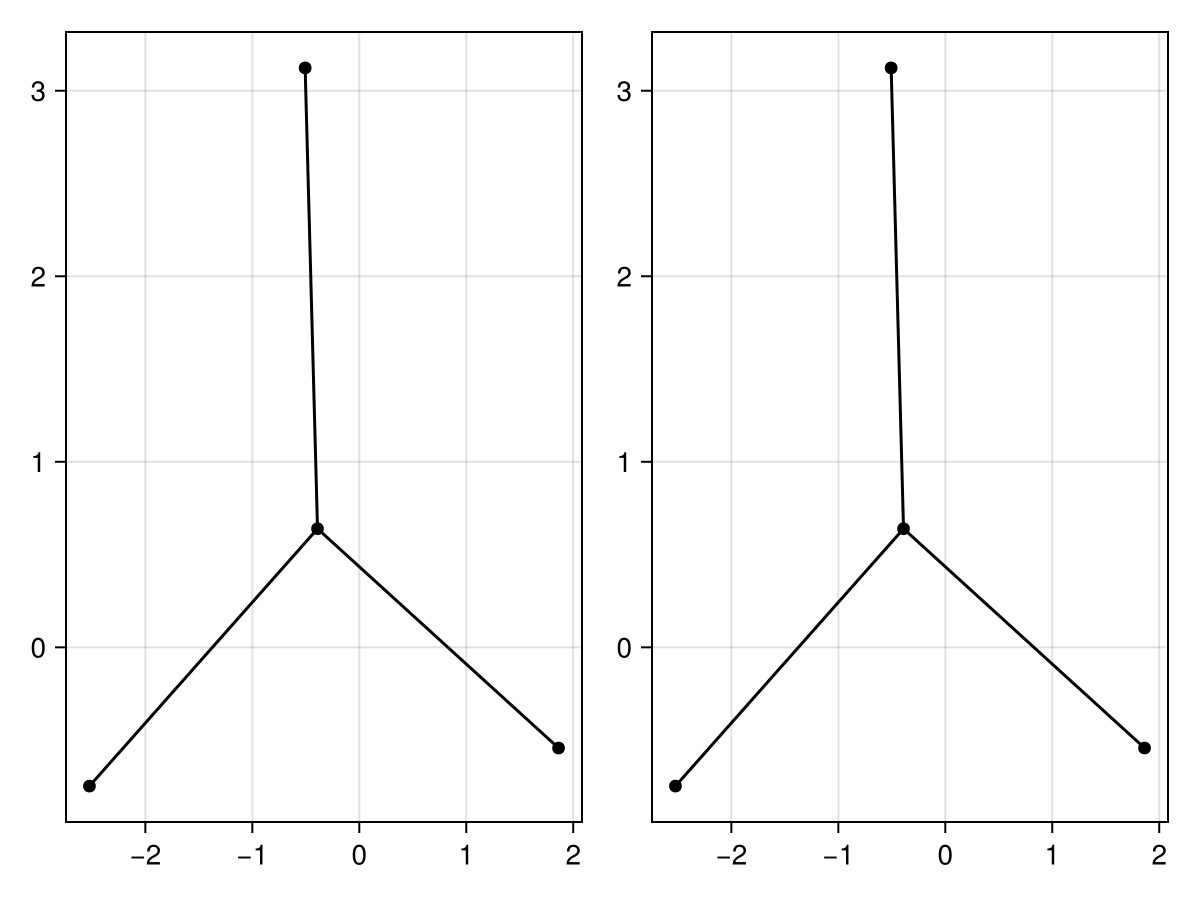

In [63]:
g1 = star_graph(4)
g2 = star_graph(4)
f = Figure()
ax1 = Axis(f[1,1])
ax2 = Axis(f[1,2])
graphplot!(ax1, g1)
graphplot!(ax2, g2)
f

In [65]:
all_isomorph(star_graph(4), star_graph(4)) |> collect

6-element Vector{Vector{Tuple{Int64, Int64}}}:
 [(1, 1), (2, 2), (3, 3), (4, 4)]
 [(1, 1), (2, 2), (4, 3), (3, 4)]
 [(1, 1), (3, 2), (2, 3), (4, 4)]
 [(1, 1), (3, 2), (4, 3), (2, 4)]
 [(1, 1), (4, 2), (2, 3), (3, 4)]
 [(1, 1), (4, 2), (3, 3), (2, 4)]

# V2

In [459]:
L = 6
rs = ca_ucodes_f1()
numrs = length(rs)
# rs = 0:255
mas = MolAut.(L, rs;
    # reduced=true
    reduced=false
);

In [456]:
xx = countmap(degree.(Ref(g1), 1:nv(g1)))

Dict{Int64, Int64} with 1 entry:
  4 => 4

In [460]:
function measure(acg)
    degs = [(indegree(acg, v), outdegree(acg, v)) for v in 1:nv(acg)]
    countmap(degs)
end

acgs_by_m = Dict()
rs_by_m = Dict()

for i in 1:numrs
    mg = mas[i].mg
    acs = attracting_components(mg)
    for ac in acs
        acg, acg_mapping = induced_subgraph(mg, ac)
        acsize = nv(acg)
        if acsize != 1
            m = measure(acg)
            if haskey(acgs_by_m, m)
                push!(acgs_by_m[m], acg)
                push!(rs_by_m[m], rs[i])
            else
                acgs_by_m[m] = [acg]
                rs_by_m[m] = [rs[i]]
            end
        end
    end
end

ms = collect(keys(acgs_by_m))
sort!(ms; by=m->-length(acgs_by_m[m]))
samples = [acgs_by_m[m][1] for m in ms];

[(k, length(acgs_by_m[k])) for k in ms]

24-element Vector{Tuple{Dict{Tuple{Int64, Int64}, Int64}, Int64}}:
 (Dict((1, 1) => 2, (2, 2) => 1), 18)
 (Dict((2, 2) => 4), 9)
 (Dict((3, 3) => 8, (2, 2) => 3, (6, 6) => 1, (4, 4) => 6), 6)
 (Dict((1, 1) => 2), 6)
 (Dict((1, 1) => 2, (2, 2) => 3), 6)
 (Dict((5, 5) => 24, (6, 6) => 4, (4, 4) => 36), 2)
 (Dict((5, 5) => 6, (1, 1) => 6, (3, 3) => 20, (2, 2) => 15, (6, 6) => 1, (4, 4) => 15), 2)
 (Dict((2, 2) => 12, (4, 4) => 18), 2)
 (Dict((5, 5) => 6, (2, 4) => 6, (1, 4) => 6, (4, 2) => 3, (3, 4) => 6, (4, 3) => 18, (6, 6) => 1, (5, 4) => 6, (4, 4) => 9, (6, 3) => 2…), 2)
 (Dict((2, 2) => 12), 2)
 (Dict((1, 1) => 12, (2, 2) => 18), 2)
 (Dict((5, 5) => 24, (3, 3) => 8, (2, 2) => 6, (6, 6) => 16, (4, 4) => 9), 1)
 (Dict((6, 6) => 64), 1)
 (Dict((5, 5) => 6, (2, 4) => 3, (1, 2) => 6, (6, 5) => 6, (5, 4) => 6, (3, 3) => 8, (6, 6) => 1, (2, 3) => 6, (4, 4) => 18, (6, 4) => 3…), 1)
 (Dict((5, 5) => 30, (6, 5) => 12, (5, 6) => 12, (4, 6) => 3, (6, 6) => 4, (6, 4) => 3), 1)
 (Dict((5, 5) => 6,

In [477]:
i = 6
m = ms[i]
acgs = acgs_by_m[m]
@show length(acgs) rs_by_m[m]

g = acgs[1]
f = graphplot(g;
    nlabels=[g[l] for l in labels(g)],
    layout=Spring(dim=3)
)
GLMakie.closeall()
display(GLMakie.Screen(), f)

length(acgs) = 2
rs_by_m[m] = [57, 43]


GLMakie.Screen(...)

## Make sure the measures are legit

In [458]:
tdname = tempname("./")
mkdir(tdname)

for mi in 1:length(ms)
    mdname = joinpath(tdname, "mi$mi")
    mkdir(mdname)


    m = ms[mi]
    acgs = acgs_by_m[m]
    rs = rs_by_m[m]

    for i in 1:length(rs)
        g = acgs[i]
    
        auto_kwargs = Dict()
        edge_color = [g[s,d] for (s,d) in edge_labels(g)]
        uecs = unique(edge_color)
        if length(uecs) == 1
            auto_kwargs[:edge_attr] = (; colorrange=(uecs[1] - 1e-5, uecs[1] + 1e-5))
            auto_kwargs[:arrow_attr] = (; colorrange=(uecs[1] - 1e-5, uecs[1] + 1e-5))
        end
        
        f = graphplot(g;
            nlabels=[g[l] for l in labels(g)],
            edge_color,
            auto_kwargs...
            # layout=Spring(dim=3)
        )
        # Colorbar()
        f.axis.title = @sprintf "m=%s\nr=%d" string(m) rs[i]
    
        save(joinpath(mdname, "$i.png"), f)
    end
end

nothing

## Make a luxor report

In [224]:
using Luxor

### DEMO

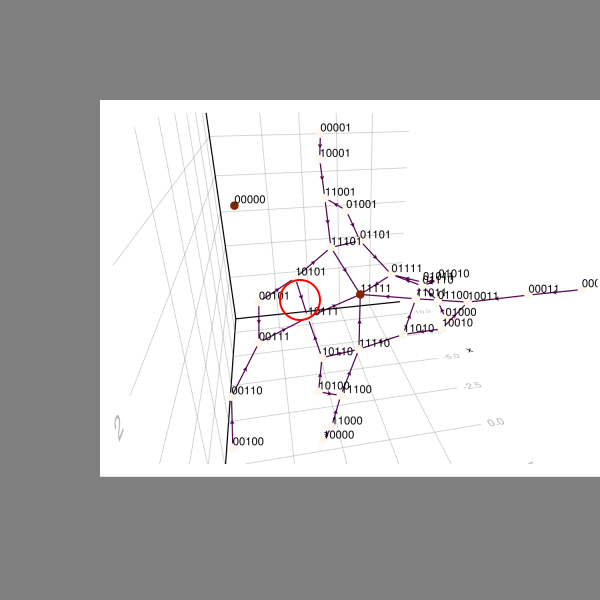

In [376]:
d = Drawing(600, 600)
# origin()
background("gray")
sethue("white")

gsave()
s = 0.4
scale(s)
placeimage(sp, Luxor.Point(100/s, 100/s))
grestore()

sethue("red")
circle(Luxor.Point(300, 300), 20, action=:stroke)

finish()
preview()
# d

# Bits and bobs

In [3]:
GC.gc()
empty!(Out)
GC.gc()